In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai import *
from fastai.text import *
import pandas as pd

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/home/datawrestler/.fastai/data/imdb_sample/texts.csv')]

In [6]:
df = pd.read_csv(path/'texts.csv')

In [9]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [10]:
help(TextDataBunch)

Help on class TextDataBunch in module fastai.text.data:

class TextDataBunch(fastai.basic_data.DataBunch)
 |  General class to get a `DataBunch` for NLP. Subclassed by `TextLMDataBunch` and `TextClasDataBunch`.
 |  
 |  Method resolution order:
 |      TextDataBunch
 |      fastai.basic_data.DataBunch
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  save(self, cache_name:Union[pathlib.Path, str]='tmp')
 |      Save the `DataBunch` in `self.path/cache_name` folder.
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  from_csv(path:Union[pathlib.Path, str], csv_name, valid_pct:float=0.2, test:Union[str, NoneType]=None, tokenizer:fastai.text.transform.Tokenizer=None, vocab:fastai.text.transform.Vocab=None, classes:Collection[str]=None, header='infer', text_cols:Union[int, Collection[int], str, Collection[str]]=1, label_cols:Union[int, Collection[int], str, Collection[str]]=0, label_delim:str=None, **kwargs)

In [12]:
data_lm.save()

In [13]:
# tokenization
data = TextClasDataBunch.load(path)
data.show_batch()

text,target
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n\n xxmaj it 's usually satisfying to watch a film director change his style / subject ,",negative
"xxbos i really wanted to love this show . i truly , honestly did . \n\n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj xxunk "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance of love",negative
"xxbos \n\n i 'm sure things did n't exactly go the same way in the real life of xxmaj homer xxmaj hickam as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj october xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj hickam 's",positive
"xxbos xxmaj to review this movie , i without any doubt would have to quote that memorable scene in xxmaj tarantino 's "" xxmaj pulp xxmaj fiction "" ( xxunk ) when xxmaj jules and xxmaj vincent are talking about xxmaj mia xxmaj wallace and what she does for a living . xxmaj jules tells xxmaj vincent that the "" xxmaj only thing she did worthwhile was pilot "" .",negative


In [14]:
# numericalization
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [19]:
# tokens
data.train_ds[0][0]

Text xxbos xxmaj this was an excellent xxunk episode , although i had never been seen the older ones , i never thought the doctor would go up against anything that is xxunk , extra xxunk of course but not xxunk . 

 xxmaj this episode brings the things that we most fear and how would we humans , in a futuristic time , would fight and defeat real live evil when most odds say that would be impossible . 

 xxmaj being that it 's a family film i am surprised that they brought some stuff in like fear and faith , especially if its also going to entertain xxmaj american audiences . xxmaj but who care about what xxmaj xxunk say , we rock ! xxmaj doctor xxmaj who has shown potential ever since from episode one from the new series in 2005 , first being so harmless to scary , from fun to serious , from light to darkness . i hope many old fans will one day soon say " xxmaj the old xxmaj doctor xxmaj who has returned " . 

 10 out of 10

In [20]:
# numbers
data.train_ds[0][0].data[:10]

array([  2,   4,  20,  25,  48, 483,   0, 387,   9, 280])

In [22]:
help(TextList)

Help on class TextList in module fastai.text.data:

class TextList(fastai.data_block.ItemList)
 |  Basic `ItemList` for text data.
 |  
 |  Method resolution order:
 |      TextList
 |      fastai.data_block.ItemList
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, items:Iterator, vocab:fastai.text.transform.Vocab=None, pad_idx:int=1, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get(self, i)
 |      Subclass if you want to customize how to create item `i` from `self.items`.
 |  
 |  label_for_lm(self, **kwargs)
 |      A special labelling method for language models.
 |  
 |  reconstruct(self, t:torch.Tensor)
 |      Reconstuct one of the underlying item for its data `t`.
 |  
 |  show_xys(self, xs, ys, max_len:int=70) -> None
 |      Show the `xs` (inputs) and `ys` (targets). `max_len` is the maximum number of tokens displayed.
 |  
 |  show_xyzs(self, xs, ys, zs, max_len:int=70)
 |      Show `xs` (inputs), `ys`

In [21]:
# use the datablock api
data = (TextList.from_csv(path, 'texts.csv', col='text')
       .split_from_df(cols=2)
       .label_from_df(cols=0)
       .databunch())

TypeError: __init__() got an unexpected keyword argument 'col'

In [24]:
# grab full dataset
path = untar_data(URLs.IMDB)

In [25]:
path.ls()

[PosixPath('/home/datawrestler/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/datawrestler/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/home/datawrestler/.fastai/data/imdb/test'),
 PosixPath('/home/datawrestler/.fastai/data/imdb/README'),
 PosixPath('/home/datawrestler/.fastai/data/imdb/train'),
 PosixPath('/home/datawrestler/.fastai/data/imdb/unsup'),
 PosixPath('/home/datawrestler/.fastai/data/imdb/tmp_clas')]

In [26]:
(path/'train').ls()

[PosixPath('/home/datawrestler/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/home/datawrestler/.fastai/data/imdb/train/neg'),
 PosixPath('/home/datawrestler/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/home/datawrestler/.fastai/data/imdb/train/pos')]

In [36]:
import os
base_imdb = '/home/datawrestler/.fastai/data/imdb/train/'
imdb_path = '/home/datawrestler/.fastai/data/imdb/train/pos/8851_7.txt'

all_text = []
all_labels = []

for label in ['pos', 'neg']:
    path = os.path.join(base_imdb, label)
    files = os.listdir(path)
    text_files = [file for file in files if file.endswith('.txt')]
    for tfile in text_files:
        text = open(os.path.join(path, tfile), 'r').read()
        all_text.append(text)
        all_labels.append(label)
        
    


In [38]:
df = pd.DataFrame({'text': all_text,
                  'labels': all_labels})

df = df.sample(n=df.shape[0])
df.head()

,text,labels
17672,"I absolutely hate this programme, what kind of...",neg
4748,I think this is a lovely family movie. There a...,pos
7881,I became a fan of the TV series `Homicide: Lif...,pos
3738,The one of the most remarkable sci-fi movies o...,pos
7160,Engrossing drama of four men on a canoing week...,pos


In [41]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.1)

In [39]:
help(TextLMDataBunch)

Help on class TextLMDataBunch in module fastai.text.data:

class TextLMDataBunch(TextDataBunch)
 |  Create a `TextDataBunch` suitable for training a language model.
 |  
 |  Method resolution order:
 |      TextLMDataBunch
 |      TextDataBunch
 |      fastai.basic_data.DataBunch
 |      builtins.object
 |  
 |  Class methods defined here:
 |  
 |  create(train_ds, valid_ds, test_ds=None, path:Union[pathlib.Path, str]='.', no_check:bool=False, bs=64, num_workers:int=0, device:torch.device=None, collate_fn:Callable=<function data_collate at 0x7f2677b48bf8>, dl_tfms:Union[Collection[Callable], NoneType]=None, **kwargs) -> fastai.basic_data.DataBunch from builtins.type
 |      Create a `TextDataBunch` in `path` from the `datasets` for language modelling.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from TextDataBunch:
 |  
 |  save(self, cache_name:Union[pathlib.Path, str]='tmp')
 |      Save the `DataBunch` in `self.path/cache_name

In [42]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [43]:
def tokenizer(text):
    return [token for token in nlp.tokenizer(text)]

In [58]:
data_lm = (TextLMDataBunch.from_df(train_df=train, valid_df=val,
                                  text_cols='text', path=base_imdb, device=device))

In [59]:
# numbers
data_lm.train_ds[0][0].data[:10]

array([  2,   4,  53,  18, 321,  45,   8, 372,  10, 693])

In [60]:
data_lm.show_batch()

idx,text
0,"even if i have n't seen all his films yet , i 'd have to say that this is xxmaj spielberg at his peak . xxmaj it 's pretty sad to see that movies as great as "" xxmaj the xxmaj color xxmaj purple "" do n't come along too often 'cause i think all of us are in desperate need of first - class motion picture entertainment in these"
1,"justin and xxmaj june xxmaj duprez were great in the leading roles of lovers , both of them slightly and refreshingly stilted , but the parts did n't call for a huge range of emotions : only pure love mattered . \n\n xxmaj there 's a couple of mildly violent images in it , but rest assured this is a glorious feelgood experience with a 100 % positive message ,"
2,"names , but i ca n't remember what they are for the likes of me . xxmaj he fights off this invading male , to win her love . xxmaj they later on create a den , and the vixen gives birth to four adorable xxunk of which is blind . xxmaj there are many happy and playful moments featuring the fox family , but tragedy and bad luck strike"
3,"enough atmosphere to shake a stick at , xxmaj undying is the game to beat in my books as the best horror title . i just wish that this had made it to a console system but alas poor xxup pc sales xxunk that one in the bud . xxbos i 've seen a slew of "" 80s rocker horrors "" over the years , from rubbish like "" xxmaj"
4,", great acting and a superb atmosphere . \n\n xxmaj in the film you will follow 8 people for one day in the city of antwerp , they are all individuals and sometimes plain weird ( that 's how i love them ! ) . \n\n i 'm not going to say anything else , just go see and enjoy it . xxbos xxmaj it 's pretty bad when the"


In [61]:
import torch 

# specify device type
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cuda')

In [62]:
help(language_model_learner)

Help on function language_model_learner in module fastai.text.learner:

language_model_learner(data:fastai.basic_data.DataBunch, bptt:int=70, emb_sz:int=400, nh:int=1150, nl:int=3, pad_token:int=1, drop_mult:float=1.0, tie_weights:bool=True, bias:bool=True, qrnn:bool=False, pretrained_model:str=None, pretrained_fnames:Union[Tuple[str, str], NoneType]=None, **kwargs) -> 'LanguageLearner'
    Create a `Learner` with a language model from `data`.



In [97]:
# drop_mult = dropout rate
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.3)

In [98]:
learn.model = learn.model.to(device)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot(skip_end=15)

In [68]:
# fine tune last layers
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,4.349803,4.193694,0.273369


In [ ]:
# fit one cycle only calibrates the last layers. To unfreeze the middle weights,
# we can unfreeze the weights and retrain
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy


In [ ]:
# save model
learn.save('fine_tuned')

In [ ]:
# to load up a model
# learn.load('fine_tuned')

In [ ]:
# to generate text
learn.predict('I like this movie because ', 100, temperature=1.1, min_p=0.001)

In [ ]:
# we have to save the model but also its encoer, the parts that is responsible 
# for creating and updating the hidden state. For the next part, we don't
# care about the part that tries to guess the next word
learn.save_encoder('fine_tuned_enc')

In [72]:
help(TextClasDataBunch)

Help on class TextClasDataBunch in module fastai.text.data:

class TextClasDataBunch(TextDataBunch)
 |  Create a `TextDataBunch` suitable for training an RNN classifier.
 |  
 |  Method resolution order:
 |      TextClasDataBunch
 |      TextDataBunch
 |      fastai.basic_data.DataBunch
 |      builtins.object
 |  
 |  Class methods defined here:
 |  
 |  create(train_ds, valid_ds, test_ds=None, path:Union[pathlib.Path, str]='.', bs=64, pad_idx=1, pad_first=True, no_check:bool=False, **kwargs) -> fastai.basic_data.DataBunch from builtins.type
 |      Function that transform the `datasets` in a `DataBunch` for classification.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from TextDataBunch:
 |  
 |  save(self, cache_name:Union[pathlib.Path, str]='tmp')
 |      Save the `DataBunch` in `self.path/cache_name` folder.
 |  
 |  ----------------------------------------------------------------------
 |  Class methods inherited from TextDa

In [73]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)
test, val = train_test_split(test, test_size=0.2)

#### Create classifier

In [83]:
data_clas = (TextClasDataBunch.from_df(train_df=train, valid_df=val, 
                                      test_df=test, vocab=data_lm.vocab, 
                                      path=base_imdb, label_cols='labels', 
                                      text_cols='text', bs=50))

In [86]:
# create learner
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.model = learn.model.to(device)
learn.load_encoder('fine_tuned_enc')
learn.freeze()

In [90]:
# find the learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


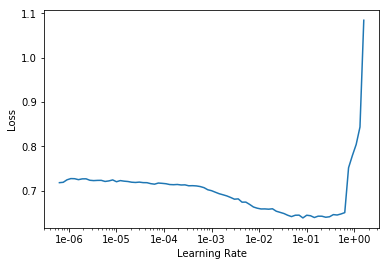

In [91]:
# plot the learning rate
learn.recorder.plot()

In [92]:
# fit with tuned learning rate from above
learn.fit_one_cycle(1, 2e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,0.489732,0.396303,0.828000


In [ ]:
learn.save('first')

In [93]:
# unfreeze the last 2 layers, don't unfreeze the whole thing
# unfreeze in an iterative process. Train with unfrozen last two layers
# then train again with the last 3 layers, then train again with the whole 
# thing
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4), 1e-2), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,0.389068,0.302034,0.882667


In [94]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4), 5e-3), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,0.329627,0.259485,0.900000


In [95]:
# unfreeze whole thing
# for training RNN, it really helps to decrease the momentum a little bit
# which is what the moms parameter does
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4), 1e-3), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,0.298484,0.248855,0.901333
2,0.294350,0.244838,0.900667


#### Language Model